# **Import**

In [ ]:
#% Import Dataframe Library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
#import  (fixed for all models)
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV  #import gridsearch
from sklearn.metrics import roc_curve, auc

# **Load dataset (BRFSS)**

Import **pandas** library for loading BRFSS dataset

Create a new variable **df** and assign it to the dataset path

In [ ]:
#% Load train and test datasets
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('drive/MyDrive/heart_2020_cleaned.csv')

Mounted at /content/drive


Display **df** : check if dataset loaded successfully

In [ ]:
#% Display .csv
display(df)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7,0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6,Yes,No,No
319791,No,29.84,Yes,No,No,0,0,No,Male,35-39,Hispanic,No,Yes,Very good,5,Yes,No,No
319792,No,24.24,No,No,No,0,0,No,Female,45-49,Hispanic,No,Yes,Good,6,No,No,No
319793,No,32.81,No,No,No,0,0,No,Female,25-29,Hispanic,No,No,Good,12,No,No,No


# **Data Understanding**

Print unique values of each column in the dataset

In [ ]:
col = ['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']

for c in col:
  print("{: >20}{: ^3}{: <500}".format(c, '', str(df[c].unique())))

        HeartDisease   ['No' 'Yes']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
                 BMI   [16.6  20.34 26.58 ... 62.42 51.46 46.56]                                                                                                                                                                                                                                                                                                                                                                                                                            

**Separate Categorical, and Continues features**

**Categorical** features

In [ ]:
categorical_features = df.select_dtypes(include=[object])
categorical_features.columns

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

**Continues** features

In [ ]:
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object')

Create **graph()** function for counting the column's unique values, and using **seaborn** library for plotting the result

Column Statics (categorical features): percentage of each value of that variable (E.g. How much is “yes”, how much is “NO”?)

In [ ]:
def univariate_graph(dataframe, col_name):
    plt.subplots(figsize = (4, 4))
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print('')
    sns.set(palette='mako')
    sns.set_style("ticks")
    ax = sns.countplot(x=dataframe[col_name], data=dataframe)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.tight_layout()

Plot the count of each column's unique values

           Sex      Ratio
Female  167805  52.472678
Male    151990  47.527322



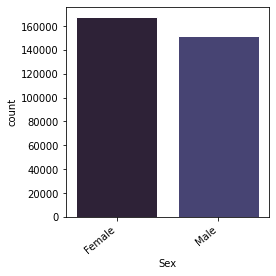

In [ ]:
univariate_graph(df, 'Sex')

Encode the AgeCategory column to integer as it is an element of [a-b] , it is neccessary for next step

In [ ]:
encode_AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
df['AgeCategory'] = df['AgeCategory'].apply(lambda x: encode_AgeCategory[x])
df['AgeCategory'] = df['AgeCategory'].astype(int)
df['AgeCategory']

0         57
1         80
2         67
3         77
4         42
          ..
319790    62
319791    37
319792    47
319793    27
319794    80
Name: AgeCategory, Length: 319795, dtype: int64

Column statics(numerical features):mean, std, min, max, 25%,50%,75%

In [ ]:
df.describe()[1:][['BMI','PhysicalHealth','MentalHealth', 'AgeCategory', 'SleepTime']]#.T.style.background_gradient(cmap='rocket_r')

,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime
mean,28.325399,3.37171,3.898366,54.355759,7.097075
std,6.356100,7.95085,7.955235,17.720429,1.436007
min,12.020000,0.00000,0.000000,21.000000,1.000000
25%,24.030000,0.00000,0.000000,42.000000,6.000000
50%,27.340000,0.00000,0.000000,57.000000,7.000000
75%,31.420000,2.00000,3.000000,67.000000,8.000000
max,94.850000,30.00000,30.000000,80.000000,24.000000


# **EDA**

**Univariate Analysis**

Univariate Analysis (Categorical)

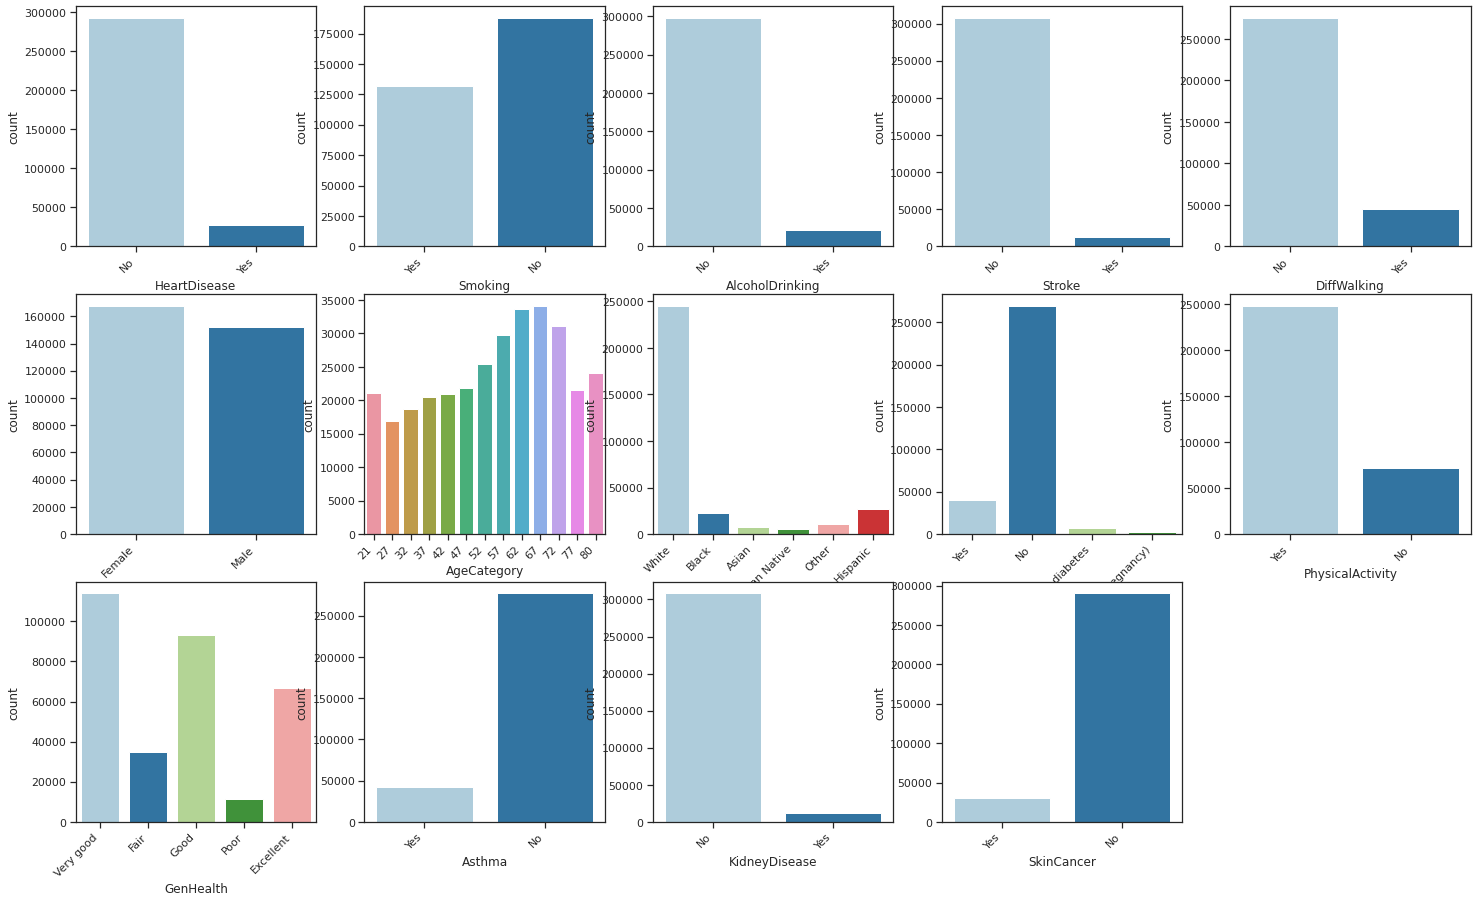

In [ ]:
def categorical_feature_func():
  i = 1
  plt.figure(figsize = (25,15))
  for feature in categorical_features:
      plt.subplot(3,5,i)
      sns.set(palette='Paired')
      sns.set_style("ticks")
      ax = sns.countplot(x = feature, data = df)#, hue = 'Stroke')#, color='#221C35') 
      ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
      i +=1

categorical_feature_func()

Univariate Analysis (Continues)

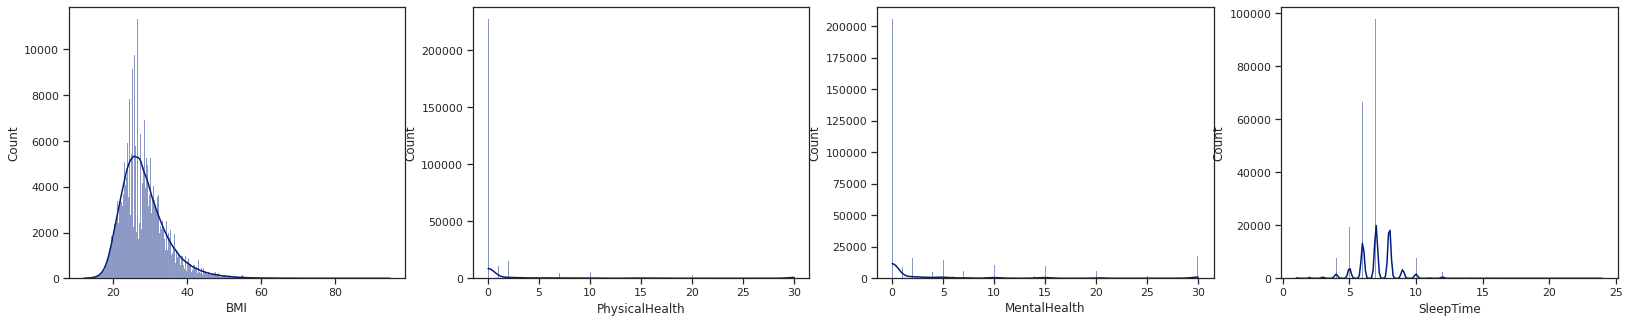

In [ ]:
def numeric_features_func():
  i=1
  plt.figure(figsize = (35,5))
  for feature in numeric_features.columns:
      plt.subplot(1,5,i)
      sns.set(palette='dark')
      sns.set_style("ticks")
      sns.histplot(df[feature],kde=True)
      plt.xlabel(feature)
      plt.ylabel("Count")
      i+=1

numeric_features_func()

**Bivariate Analysis**

Univariate Analysis (categorical)

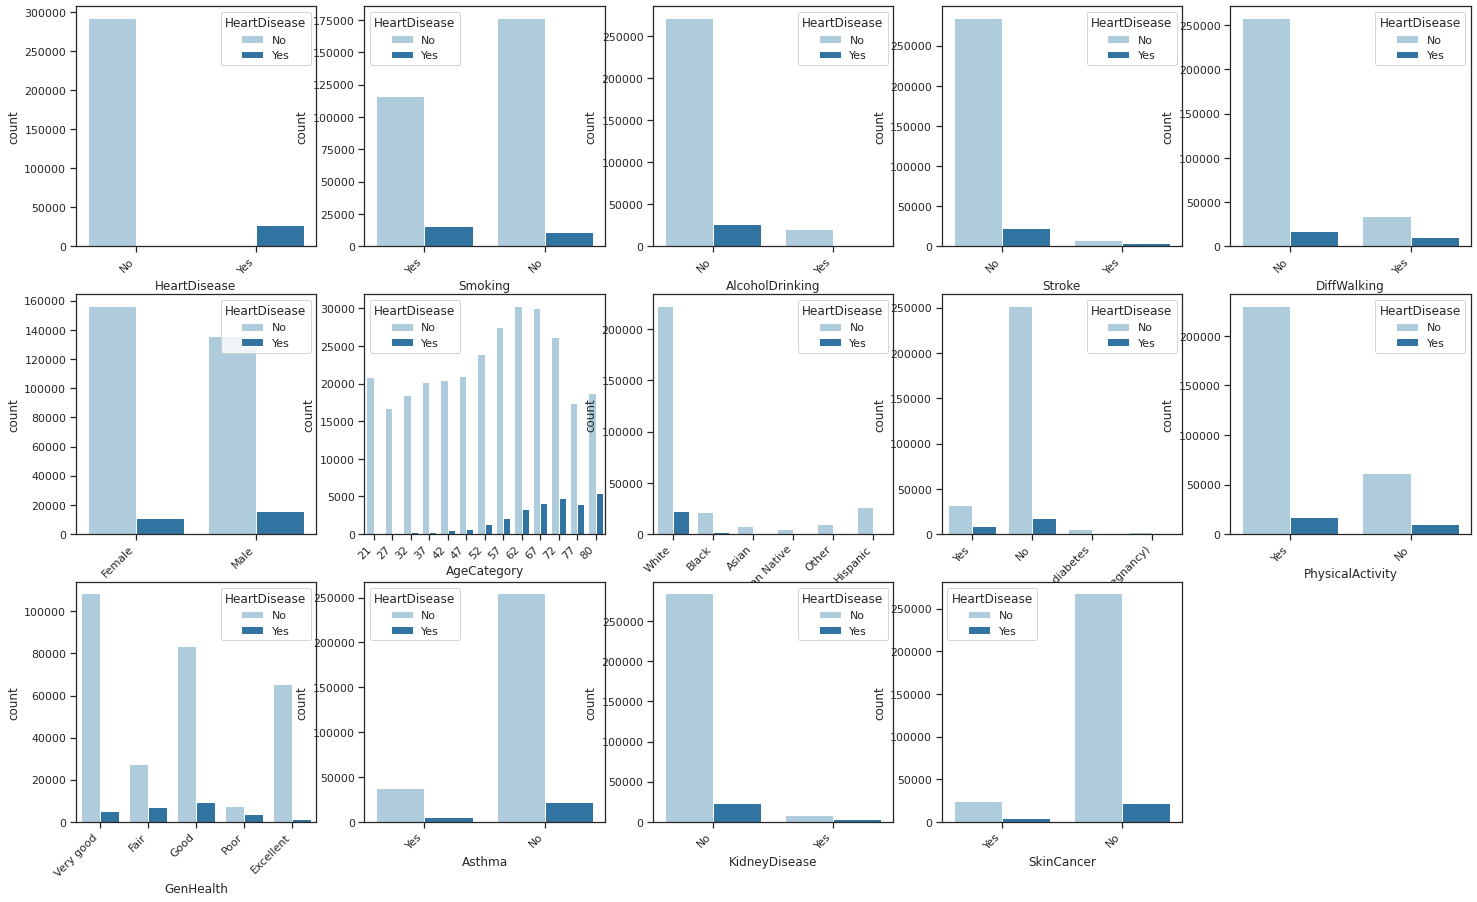

In [ ]:
def categorical_feature_func():
  i = 1
  plt.figure(figsize = (25,15))
  for feature in categorical_features:
      plt.subplot(3,5,i)
      sns.set(palette='Paired')
      sns.set_style("ticks")
      ax = sns.countplot(x = feature, data = df, hue = 'HeartDisease')
      ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
      i +=1

categorical_feature_func()

Numberic

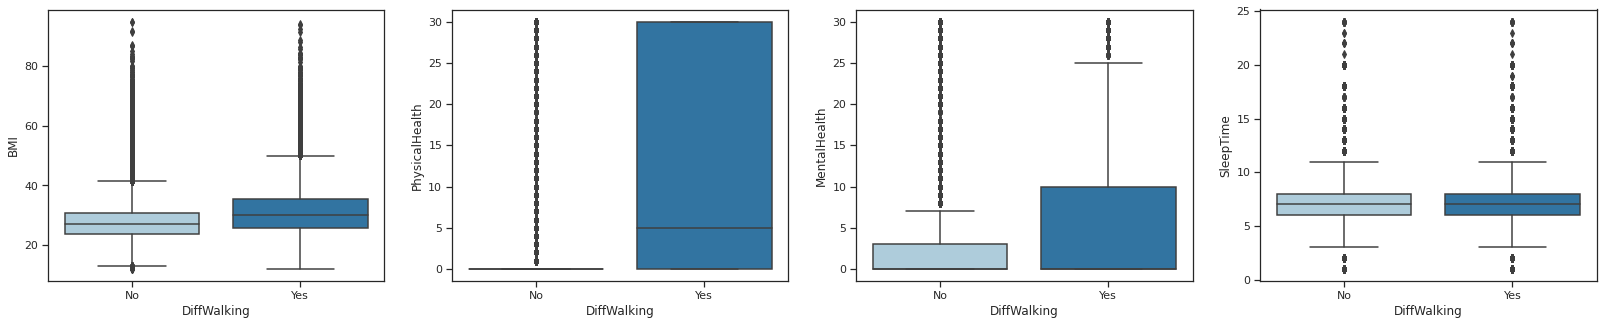

In [ ]:
def numeric_features_func(f):
  i=1
  plt.figure(figsize=(35,5))
  sns.set(palette='Paired')
  sns.set_style("ticks")
  for feature in numeric_features:
      plt.subplot(1,5,i)
      sns.boxplot(y=df[feature], x = df[f])
      i+=1

numeric_features_func('DiffWalking')

# **Preprocessing**

**Encode the columns**

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Encode columns with 2 unique values
for col in ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']:
    if df[col].dtype == 'O':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
# One-hot encode for columns with more than 2 unique values
df = pd.get_dummies(df, columns=['Race', 'Diabetic', 'GenHealth'], prefix = ['Race', 'Diabetic', 'GenHealth'])

In [ ]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,16.60,1,0,0,3,30,0,0,57,...,1,0,0,1,0,0,0,0,0,1
1,0,20.34,0,0,1,0,0,0,0,80,...,1,1,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20,30,0,1,67,...,1,0,0,1,0,0,1,0,0,0
3,0,24.21,0,0,0,0,0,0,0,77,...,1,1,0,0,0,0,0,1,0,0
4,0,23.71,0,0,0,28,0,1,0,42,...,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7,0,1,1,62,...,0,0,0,1,0,0,1,0,0,0
319791,0,29.84,1,0,0,0,0,0,1,37,...,0,1,0,0,0,0,0,0,0,1
319792,0,24.24,0,0,0,0,0,0,0,47,...,0,1,0,0,0,0,0,1,0,0
319793,0,32.81,0,0,0,0,0,0,0,27,...,0,1,0,0,0,0,0,1,0,0


## Spliting the datset into train and test

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, train_size=0.80) #make train and test splitting without target value as seprate dataframe , also stratify is None

In [ ]:
#split the train to dependent variable and independent variables
X_train= train_data.drop('HeartDisease', axis=1)
y_train= train_data['HeartDisease']

In [ ]:
#split the test to dependent variable and independent variables
X_test= test_data.drop('HeartDisease', axis=1) #split the test to dependent variable and independent variables
y_test= test_data['HeartDisease']

## Feature Scaling (StandardScaling)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)  # there is no dataleakage because we are using information of train in test not test in train

In [ ]:
##sklearn* **(x – μ) / σ
# scaler = preprocessing.MinMaxScaler()
# names = df.columns
# d = scaler.fit_transform(df)
# scaled_df = pd.DataFrame(d, columns=names)
# scaled_df.head()

applying index

### Correlation Table and Matrix, (it needs change)

In [ ]:
correlation = df.corr()
print(correlation['HeartDisease'].sort_values(ascending = False),'\n')

HeartDisease                           1.000000
AgeCategory                            0.231583
DiffWalking                            0.201258
Stroke                                 0.196835
Diabetic_Yes                           0.183072
GenHealth_Poor                         0.174662
PhysicalHealth                         0.170721
GenHealth_Fair                         0.147954
KidneyDisease                          0.145197
Smoking                                0.107764
SkinCancer                             0.093317
Sex                                    0.070040
BMI                                    0.051803
Asthma                                 0.041444
Race_White                             0.040121
GenHealth_Good                         0.039033
MentalHealth                           0.028591
Diabetic_No, borderline diabetes       0.016182
Race_American Indian/Alaskan Native    0.008547
SleepTime                              0.008327
Race_Other                            -0

Index(['HeartDisease', 'AgeCategory', 'DiffWalking', 'Stroke', 'Diabetic_Yes',
       'GenHealth_Poor', 'PhysicalHealth', 'GenHealth_Fair', 'KidneyDisease',
       'Smoking', 'SkinCancer', 'Sex', 'BMI', 'Asthma', 'Race_White',
       'GenHealth_Good', 'MentalHealth', 'Diabetic_No, borderline diabetes',
       'Race_American Indian/Alaskan Native', 'SleepTime', 'Race_Other',
       'Race_Black', 'Diabetic_Yes (during pregnancy)', 'Race_Asian',
       'AlcoholDrinking', 'Race_Hispanic', 'PhysicalActivity',
       'GenHealth_Very good', 'GenHealth_Excellent', 'Diabetic_No'],
      dtype='object')


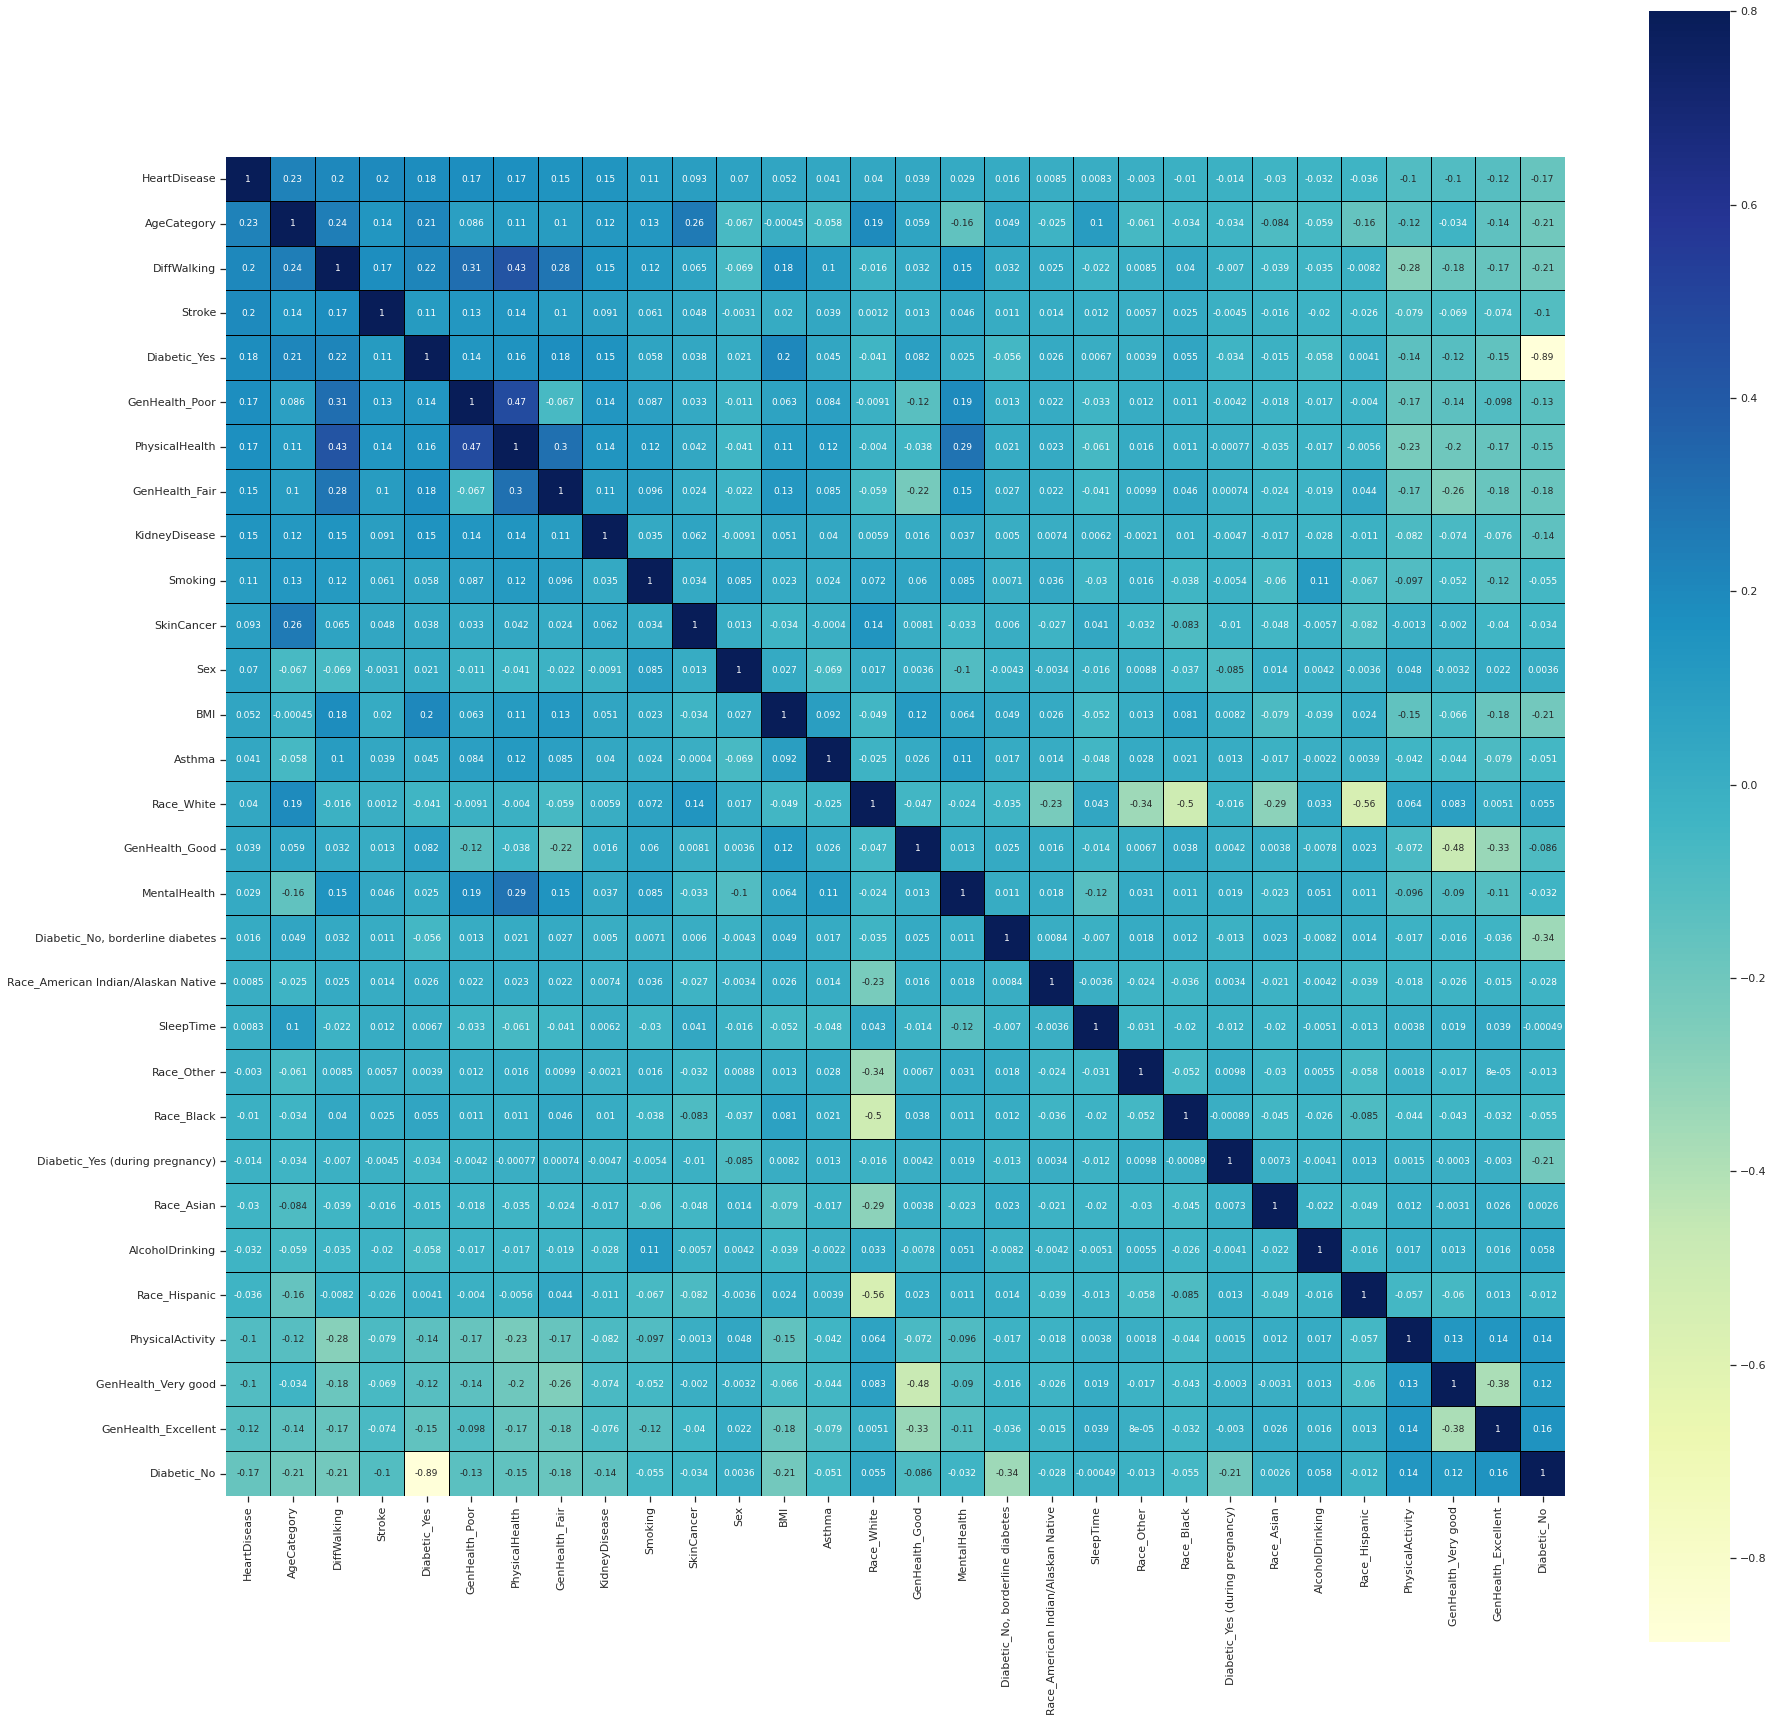

In [ ]:
k= 30
cols = correlation.nlargest(k,'HeartDisease')['HeartDisease'].index
print(cols)
cm = np.corrcoef(df[cols].values.T)
f , ax = plt.subplots(figsize = (30,30))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='YlGnBu',
            linecolor="black",xticklabels = cols.values ,annot_kws = {'size':9},yticklabels = cols.values)

In [ ]:
df['id'] = range(1,319796)
df = df.set_index('id')
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
id,,,,,,,,,,,,,,,,,,,,,
1,0,16.60,1,0,0,3,30,0,0,57,...,1,0,0,1,0,0,0,0,0,1
2,0,20.34,0,0,1,0,0,0,0,80,...,1,1,0,0,0,0,0,0,0,1
3,0,26.58,1,0,0,20,30,0,1,67,...,1,0,0,1,0,0,1,0,0,0
4,0,24.21,0,0,0,0,0,0,0,77,...,1,1,0,0,0,0,0,1,0,0
5,0,23.71,0,0,0,28,0,1,0,42,...,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319791,1,27.41,1,0,0,7,0,1,1,62,...,0,0,0,1,0,0,1,0,0,0
319792,0,29.84,1,0,0,0,0,0,1,37,...,0,1,0,0,0,0,0,0,0,1
319793,0,24.24,0,0,0,0,0,0,0,47,...,0,1,0,0,0,0,0,1,0,0


## Check the dataset is imbalance or not

In [ ]:
df['HeartDisease'].value_counts()

0    292422
1     27373
Name: HeartDisease, dtype: int64

In [ ]:
#y_train.value_counts()

#####   Data is moderately imbalance (minority calss is between 1-20% of the dataset).

## Handling imbalance data

In [ ]:
# SMOTE method
from imblearn.over_sampling import SMOTE

In [ ]:
# #split the train to dependent variable and independent variables
# X_train= train_data.drop('HeartDisease', axis=1)
# y_train= train_data['HeartDisease']

In [ ]:
smote=SMOTE(sampling_strategy='minority')
X_train_blnc , y_train_blnc=smote.fit_resample(X_train,y_train)

In [ ]:
##check that the train is still imbalance or not
y_train_blnc.value_counts()

0    233934
1    233934
Name: HeartDisease, dtype: int64

In [ ]:
# X_test= test_data.drop('HeartDisease', axis=1) #split the test to dependent variable and independent variables
# y_test= test_data['HeartDisease']

#### The train set is now balanced

## K-fold Cross Validation

In [ ]:
#import KFold
from sklearn.model_selection import KFold

In [ ]:
# make cross validation
cv=KFold(n_splits=10, random_state=None,shuffle=False) 

# **Modeling**

## Decision Tree

In [ ]:
#import
from sklearn.tree import DecisionTreeClassifier
#from mlxtend.plotting import plot_decision_regions

In [ ]:
#make the model and parameters
tree=DecisionTreeClassifier(random_state=1024)  #model    # for the class weight we use : ,class_weight='balanced'because of imbalnace dat in test dataset
#range of hyparameters of model
#weights=[{0,1},{1,10.68}]  # two dictionary in a list. Each disctionary is showing a class and it's weigtht
param_dict = {"criterion":['entropy'], "max_depth": [100]} #best values
#param_dict = {"criterion":['gini','entropy'], "max_depth": max_depth}

In [ ]:
#hyparameters Tuning
tree_cv=GridSearchCV(tree, param_grid=param_dict, cv=cv,n_jobs=-1,verbose=10 )  # for tuning the model

In [ ]:
#fit the model on the train data set
tree_cv.fit(X_train_blnc , y_train_blnc)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=1024), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [100]},
             verbose=10)

In [ ]:
#the best hyperparametrs
tree_cv.best_params_

{'criterion': 'entropy', 'max_depth': 100}

In [ ]:
#prediction
y_pred=tree_cv.predict(X_test)

In [ ]:
#check the lenght
print(len(y_pred))
print(len(y_test))

63959
63959


In [ ]:
#Evaluation
cm=confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[53242  5288]
 [ 3929  1500]]
0.8558920558482778
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     58530
           1       0.22      0.28      0.25      5429

    accuracy                           0.86     63959
   macro avg       0.58      0.59      0.58     63959
weighted avg       0.87      0.86      0.86     63959



Text(66.5, 0.5, 'Truth')

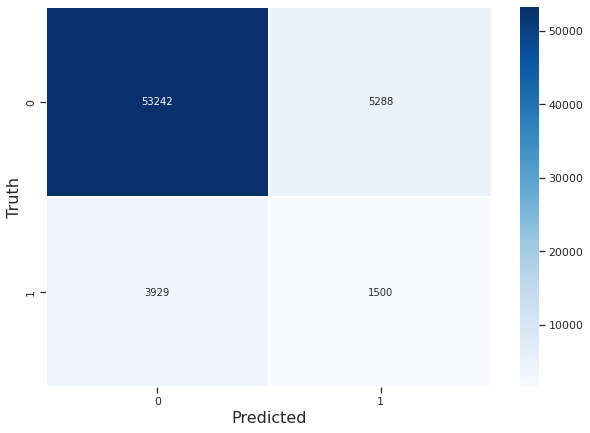

In [ ]:
#Confusion MAtrix on heatmap
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,linewidths=0.8,fmt='d',cmap='Blues')
plt.xlabel('Predicted',fontsize=16)
plt.ylabel('Truth',fontsize=16)

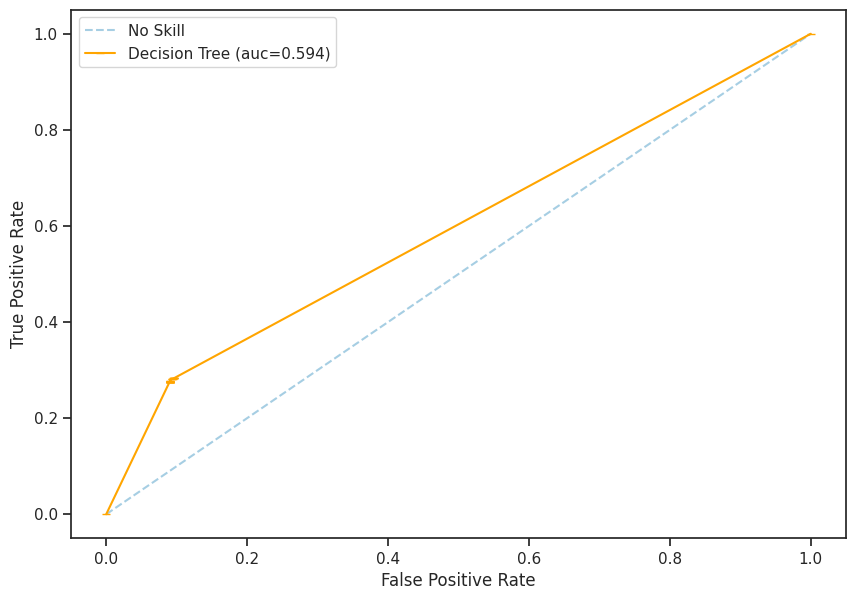

In [ ]:
#ROC-AUC
#predict Probabilities  
y_score_tree=tree_cv.predict_proba(X_test)   #results are probailities for each sample for each class
#retrieve the probabilities only for the class1 (yes, positve class)
yes_probs=y_score_tree[:,1]
#Size of the plot
plt.figure(figsize=(10,7), dpi=100)
#plot "No-Skill" on ROC Curve
plt.plot([0,1],[0,1],linestyle='--',label='No Skill')
# calculate the features of ROC curve
fpr_tree , tpr_tree, threshold_tree=roc_curve(y_test,yes_probs)  # false positive, true posistive, threshold
#AUC
auc_tree=auc(fpr_tree , tpr_tree)
#Plot the ROC Curve
plt.plot(fpr_tree , tpr_tree, marker='_', label='Decision Tree (auc=%0.3f)' % auc_tree, color='Orange')
#X-axis label
plt.xlabel("False Positive Rate")
#Y-axis label
plt.ylabel("True Positive Rate")
#show the legend
plt.legend()
#show the plot
plt.show()

## Perceptron

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

In [ ]:
param_per = {'tol':[0.0001],
             'random_state': [2]}
 
pr_model = GridSearchCV(Perceptron(), param_per, refit = True, cv=cv, verbose = 3)
 
# fitting the model for grid search
pr_model.fit(X_train_blnc, y_train_blnc)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV 1/10] END .......random_state=2, tol=0.0001;, score=0.682 total time=   0.8s
[CV 2/10] END .......random_state=2, tol=0.0001;, score=0.762 total time=   0.7s
[CV 3/10] END .......random_state=2, tol=0.0001;, score=0.704 total time=   0.7s
[CV 4/10] END .......random_state=2, tol=0.0001;, score=0.668 total time=   0.8s
[CV 5/10] END .......random_state=2, tol=0.0001;, score=0.679 total time=   0.8s
[CV 6/10] END .......random_state=2, tol=0.0001;, score=0.651 total time=   0.7s
[CV 7/10] END .......random_state=2, tol=0.0001;, score=0.678 total time=   1.4s
[CV 8/10] END .......random_state=2, tol=0.0001;, score=0.744 total time=   1.2s
[CV 9/10] END .......random_state=2, tol=0.0001;, score=0.677 total time=   1.2s
[CV 10/10] END ......random_state=2, tol=0.0001;, score=0.481 total time=   1.2s


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Perceptron(),
             param_grid={'random_state': [2], 'tol': [0.0001]}, verbose=3)

In [ ]:
y_pred = pr_model.predict(X_test)

# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.69      0.80     58629
           1       0.16      0.64      0.26      5330

    accuracy                           0.69     63959
   macro avg       0.56      0.67      0.53     63959
weighted avg       0.89      0.69      0.76     63959



In [ ]:
cm=confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[40739 17890]
 [ 1900  3430]]
0.6905830297534358
              precision    recall  f1-score   support

           0       0.96      0.69      0.80     58629
           1       0.16      0.64      0.26      5330

    accuracy                           0.69     63959
   macro avg       0.56      0.67      0.53     63959
weighted avg       0.89      0.69      0.76     63959



Text(66.5, 0.5, 'Truth')

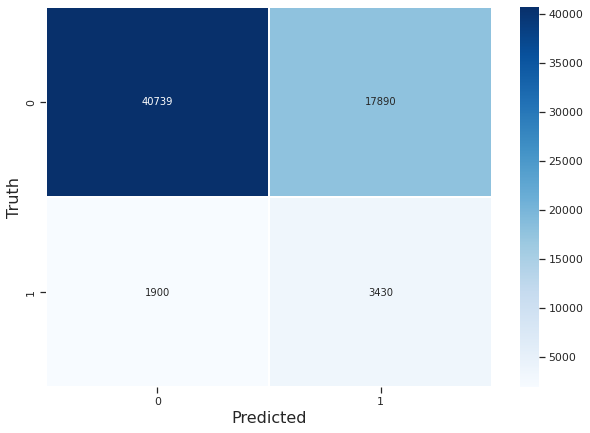

In [ ]:
#Confusion MAtrix on heatmap
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,linewidths=0.8,fmt='d',cmap='Blues')
plt.xlabel('Predicted',fontsize=16)
plt.ylabel('Truth',fontsize=16)

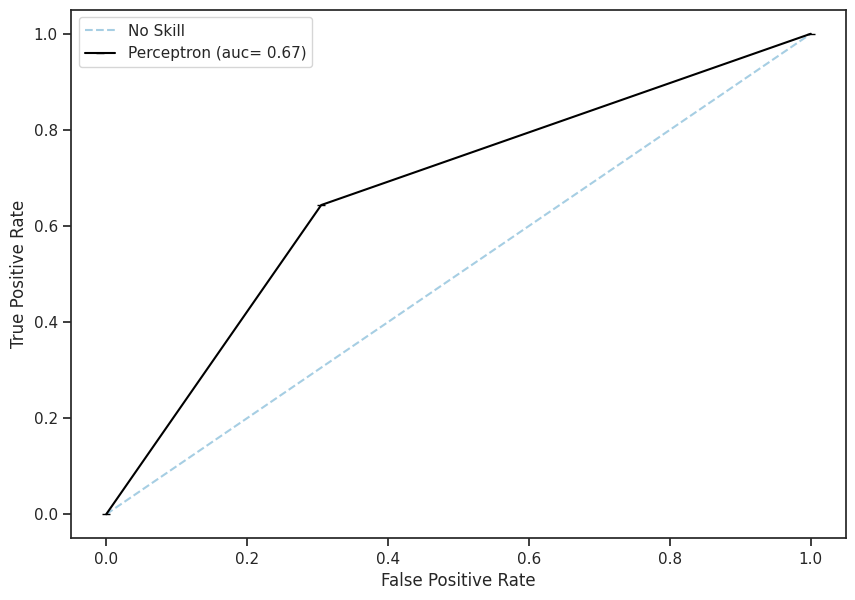

In [ ]:
#ROC-AUC
#predict Probabilities  
y_score_pr=pr_model.predict(X_test)   #results are probailities for each sample for each class

#Size of the plot
plt.figure(figsize=(10,7), dpi=100)
#plot "No-Skill" on ROC Curve
plt.plot([0,1],[0,1],linestyle='--',label='No Skill')
# calculate the features of ROC curve
fpr_pr , tpr_pr, threshold_pr=roc_curve(y_test,y_score_pr)  # false positive, true posistive, threshold
#AUC
auc_pr=auc(fpr_pr , tpr_pr)
#Plot the ROC Curve
plt.plot(fpr_pr, tpr_pr, marker='_', label='Perceptron (auc= %0.2f)' % auc_pr, color='Black')
#X-axis label
plt.xlabel("False Positive Rate")
#Y-axis label
plt.ylabel("True Positive Rate")
#show the legend
plt.legend()
#show the plot
plt.show()

## Logestic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression # import logistic regression
from sklearn.model_selection import GridSearchCV  #import gridsearch

In [ ]:
#make the model
logreg=LogisticRegression()  

In [ ]:
#hyperparameters
param_dict={"penalty":["l1","l2"],"C":np.logspace(-3,3,7)}
#param_dict={"penalty":["l1","l2"],"C":[0.1,1,10,20,100,1000]}  # we did not use this
#param_dict={"penalty":["l1","l2"],"C":[10]}# we did not use this

In [ ]:
#Grid Serch 
logreg_cv=GridSearchCV(logreg,param_dict,cv=10)

In [ ]:
#fit the model
logreg_cv.fit(X_train_blnc,y_train_blnc)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [ ]:
#the best hyperparametrs
logreg_cv.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [ ]:
#prediction
y_pred=logreg_cv.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


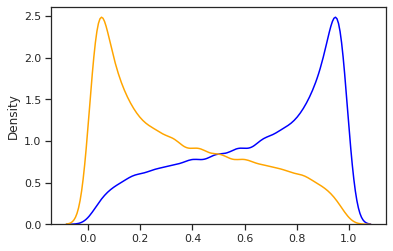

In [ ]:
#plot for comparing probability belongs to class0, class1)
prob=logreg_cv.predict_proba(X_test)
e0=[]  #empty list for class0
e1=[]  #empty list for class1
for i in prob:
  e0.append(i[0])
  e1.append(i[1])
sns.distplot(e0, hist=False, color='blue' )
sns.distplot(e1, hist=False, color='Orange')

In [ ]:
#check the lenght
print(len(y_pred))
print(len(y_test))

63959
63959


In [ ]:
#Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[43732 14720]
 [ 1206  4301]]
0.7509967322816179
              precision    recall  f1-score   support

           0       0.97      0.75      0.85     58452
           1       0.23      0.78      0.35      5507

    accuracy                           0.75     63959
   macro avg       0.60      0.76      0.60     63959
weighted avg       0.91      0.75      0.80     63959



Text(66.5, 0.5, 'Truth')

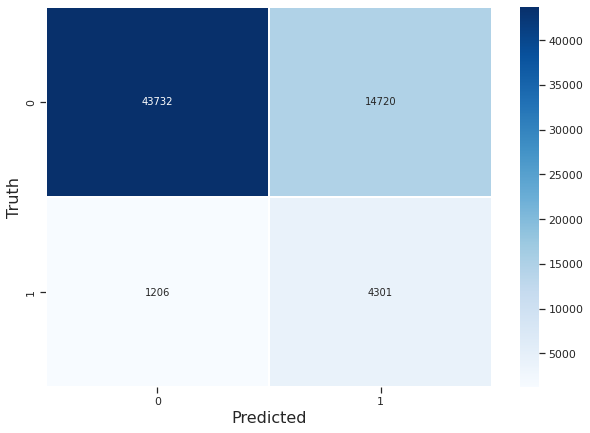

In [ ]:
#Confusion MAtrix on heatmap
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,linewidths=0.8,fmt='d',cmap='Blues')
plt.xlabel('Predicted',fontsize=16)
plt.ylabel('Truth',fontsize=16)

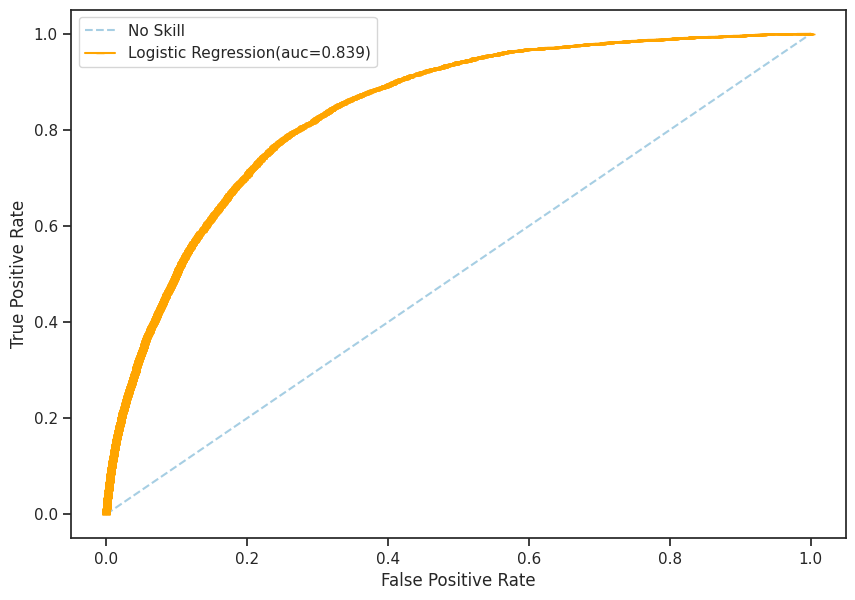

In [ ]:
#ROC-AUC
#predict Probabilities  
y_score_log=logreg_cv.predict_proba(X_test)   #results are probailities for each sample for each class
#retrieve the probabilities only for the class1 (yes, positve class)
yes_probs=y_score_log[:,1]
#Size of the plot
plt.figure(figsize=(10,7), dpi=100)
#plot "No-Skill" on ROC Curve
plt.plot([0,1],[0,1],linestyle='--',label='No Skill')
# calculate the features of ROC curve
fpr_log , tpr_log, threshold_log=roc_curve(y_test,yes_probs)  # false positive, true posistive, threshold
#AUC
auc_log=auc(fpr_log , tpr_log)
#Plot the ROC Curve
plt.plot(fpr_log , tpr_log, marker='_', label='Logistic Regression (auc=%0.3f)' %auc_log, color='Orange')
#X-axis label
plt.xlabel("False Positive Rate")
#Y-axis label
plt.ylabel("True Positive Rate")
#show the legend
plt.legend()
#show the plot
plt.show()

## Neural Network

In [ ]:
#import
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Dropout
from tensorflow.keras.losses import BinaryCrossentropy

In [ ]:
#make the layers
nn_model=Sequential([
        Dense(units=512, activation='relu'),
        Dropout(0.2),
        Dense(units=512, activation='relu'),
        Dropout(0.2),
        Dense(units=512, activation='relu'),
        Dropout(0.2),
        Dense(units=256, activation='relu'),
        Dropout(0.2),
        Dense(units=128, activation='relu'),
        Dropout(0.2),
        Dense(units=1 , activation='sigmoid')
])

In [ ]:
#set properties of the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#fit the model on the train dataset
#nn_model.fit(X_train_blnc,y_train_blnc, epochs=100)  #main one
nn_model.fit(X_train_blnc,y_train_blnc, epochs=30)   #just for make it easier we decreased the epoch number

Epoch 1/30
14624/14624 [==============================] - 185s 13ms/step - loss: 0.4837 - accuracy: 0.7739
Epoch 2/30
14624/14624 [==============================] - 183s 13ms/step - loss: 0.4712 - accuracy: 0.7792
Epoch 3/30
14624/14624 [==============================] - 183s 13ms/step - loss: 0.4632 - accuracy: 0.7838
Epoch 4/30
14624/14624 [==============================] - 178s 12ms/step - loss: 0.4562 - accuracy: 0.7874
Epoch 5/30
14624/14624 [==============================] - 180s 12ms/step - loss: 0.4508 - accuracy: 0.7898
Epoch 6/30
14624/14624 [==============================] - 186s 13ms/step - loss: 0.4457 - accuracy: 0.7930
Epoch 7/30
14624/14624 [==============================] - 183s 13ms/step - loss: 0.4397 - accuracy: 0.7958
Epoch 8/30
14624/14624 [==============================] - 190s 13ms/step - loss: 0.4360 - accuracy: 0.7979
Epoch 9/30
14624/14624 [==============================] - 188s 13ms/step - loss: 0.4325 - accuracy: 0.7992
Epoch 10/30
14624/14624 [============

In [ ]:
#predict the y value on train data and compare with actual y train and get accuracy on train
nn_model.evaluate(X_train_blnc,y_train_blnc)

14624/14624 [==============================] - 91s 6ms/step - loss: 0.3635 - accuracy: 0.8398


[0.3635338246822357, 0.8398128151893616]

In [ ]:
#predict the predicted y values and compare with actual ys , and get get accuracy on test
nn_model.evaluate(X_test,y_test)  

1999/1999 [==============================] - 13s 7ms/step - loss: 0.4923 - accuracy: 0.7534


[0.4922531545162201, 0.7534357905387878]

In [ ]:
#predict the  predicted ys
y_pred=nn_model.predict(X_test)   
y_pred

array([[0.0189257 ],
       [0.4848114 ],
       [0.0221943 ],
       ...,
       [0.03780553],
       [0.14246297],
       [0.63575673]], dtype=float32)

In [ ]:
# len(y_test[y_test==0])
# #check the lenght
# print(len(y_pred))
# print(len(y_test))

In [ ]:
#for testing different threshold   Threshold=T
y_pred=[int(f> 0.5) for f in y_pred]  

In [ ]:
#Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[44297 14155]
 [ 1615  3892]]
0.7534357948060476
              precision    recall  f1-score   support

           0       0.96      0.76      0.85     58452
           1       0.22      0.71      0.33      5507

    accuracy                           0.75     63959
   macro avg       0.59      0.73      0.59     63959
weighted avg       0.90      0.75      0.80     63959



Text(66.5, 0.5, 'Truth')

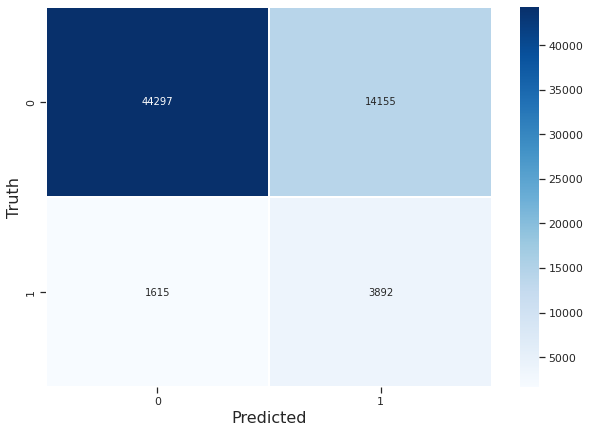

In [ ]:
#Confusion MAtrix on heatmap
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,linewidths=0.8,fmt='d',cmap='Blues')
plt.xlabel('Predicted',fontsize=16)
plt.ylabel('Truth',fontsize=16)

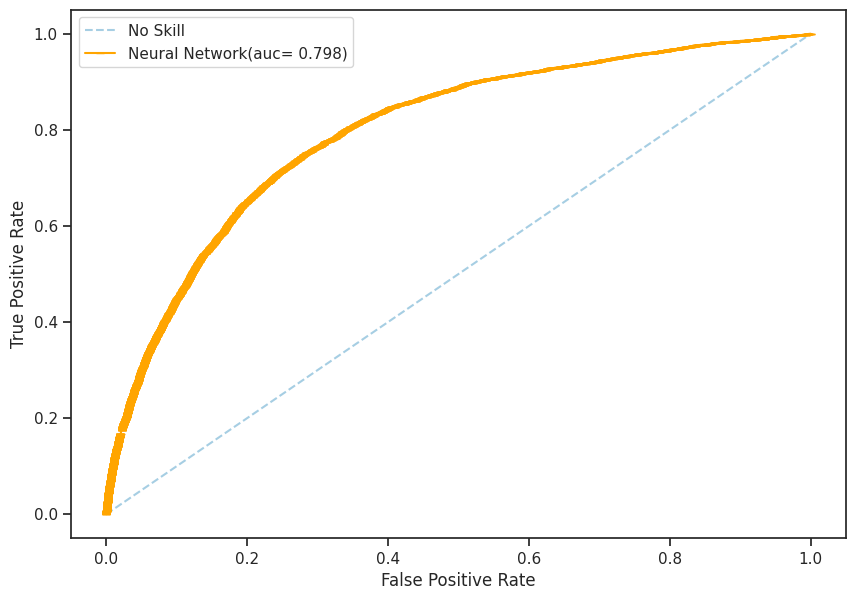

In [ ]:
#ROC-AUC
#predict Probabilities  
y_score_nn=nn_model.predict(X_test)   #results are probailities for each sample for each class

#Size of the plot
plt.figure(figsize=(10,7), dpi=100)
#plot "No-Skill" on ROC Curve
plt.plot([0,1],[0,1],linestyle='--',label='No Skill')
# calculate the features of ROC curve
fpr_nn , tpr_nn, threshold_nn=roc_curve(y_test,y_score_nn)  # false positive, true posistive, threshold
#AUC
auc_nn=auc(fpr_nn , tpr_nn)
#Plot the ROC Curve
plt.plot(fpr_nn, tpr_nn, marker='_', label='Neural Network (auc= %0.3f)' % auc_nn, color='Orange')
#X-axis label
plt.xlabel("False Positive Rate")
#Y-axis label
plt.ylabel("True Positive Rate")
#show the legend
plt.legend()
#show the plot
plt.show()

## Random Forest

In [ ]:
#import
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#number of trees in randomm forest
#n_estimators=[100,128]
# the function to measure the quality of split
criterion=['gini','entropy']
#number of features to consider at every split
#max_features=['sqrt','log2']
# maximum numbers of deppth in tree
#max_depth=[20,50,100]  # we use this based on the result of Decision Tree algorith hyperparameter tuning
# ==>
#param_dict={'criterion':criterion}
param_dict={'criterion':['entropy']}   #best parameters

In [ ]:
#make the model
rf_model=RandomForestClassifier()
rf_cv=GridSearchCV(rf_model,param_dict,cv=10)  

In [ ]:
#fit the model
rf_cv.fit(X_train_blnc,y_train_blnc)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy']})

In [ ]:
#the best hyperparametrs
rf_cv.best_params_

{'criterion': 'entropy'}

In [ ]:
#prediction
y_pred=rf_cv.predict(X_test)

In [ ]:
#check the lenght
print(len(y_pred))
print(len(y_test))

63959
63959


In [ ]:
#Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[55190  3340]
 [ 4016  1413]]
0.8849888209634297
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     58530
           1       0.30      0.26      0.28      5429

    accuracy                           0.88     63959
   macro avg       0.61      0.60      0.61     63959
weighted avg       0.88      0.88      0.88     63959



Text(66.5, 0.5, 'Truth')

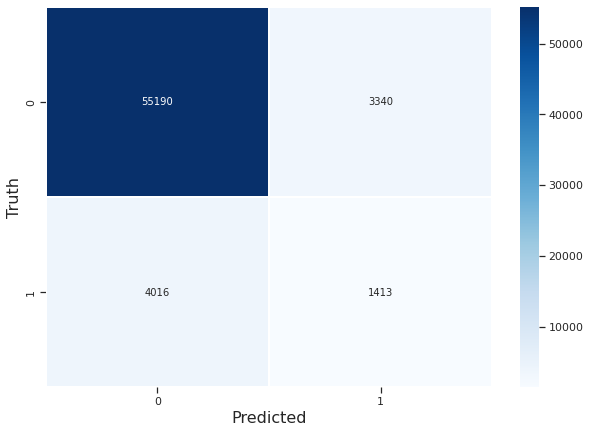

In [ ]:
#Confusion MAtrix on heatmap
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,linewidths=0.8,fmt='d',cmap='Blues')
plt.xlabel('Predicted',fontsize=16)
plt.ylabel('Truth',fontsize=16)

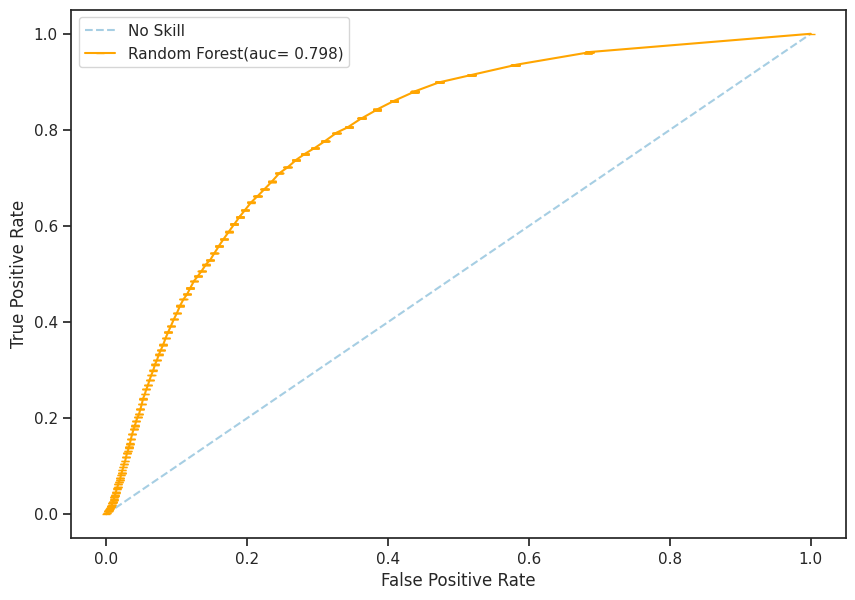

In [ ]:
#ROC-AUC
#predict Probabilities  
y_score_rf=rf_cv.predict_proba(X_test)   #results are probailities for each sample for each class
#retrieve the probabilities only for the class1 (yes, positve class)
yes_probs=y_score_rf[:,1]
#Size of the plot
plt.figure(figsize=(10,7), dpi=100)
#plot "No-Skill" on ROC Curve
plt.plot([0,1],[0,1],linestyle='--',label='No Skill')
# calculate the features of ROC curve
fpr_rf , tpr_rf, threshold_rf=roc_curve(y_test,yes_probs)  # false positive, true posistive, threshold
#AUC
auc_rf=auc(fpr_rf , tpr_rf)
#Plot the ROC Curve
plt.plot(fpr_rf, tpr_rf, marker='_', label='Random Forest (auc= %0.3f)' % auc_rf, color='Orange')
#X-axis label
plt.xlabel("False Positive Rate")
#Y-axis label
plt.ylabel("True Positive Rate")
#show the legend
plt.legend()
#show the plot
plt.show()

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

Concerning variance smoothing, float value provided will be used to calculate the largest variances of each feature and add it to the stability calculation variance

var_smoothingfloat, default=1e-9
Portion of the largest variance of all features that is added to variances for calculation stability.

In [ ]:
nb_model=GaussianNB()
params_NB = {'var_smoothing': np.logspace(1,10, num=100)}
nb_cv=GridSearchCV(nb_model, param_grid=params_NB ,cv=cv, verbose=3) 
nb_cv.fit(X_train_blnc, y_train_blnc)
y_pred = nb_cv.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     58629
           1       0.35      0.31      0.32      5330

    accuracy                           0.89     63959
   macro avg       0.64      0.63      0.63     63959
weighted avg       0.89      0.89      0.89     63959



In [ ]:
cm=confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[55442  3006]
 [ 3812  1699]]
0.8934004596694758
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     58448
           1       0.36      0.31      0.33      5511

    accuracy                           0.89     63959
   macro avg       0.65      0.63      0.64     63959
weighted avg       0.89      0.89      0.89     63959



[[45605 12964]
 [ 1770  3620]]
0.76963367157085

Text(66.5, 0.5, 'Truth')

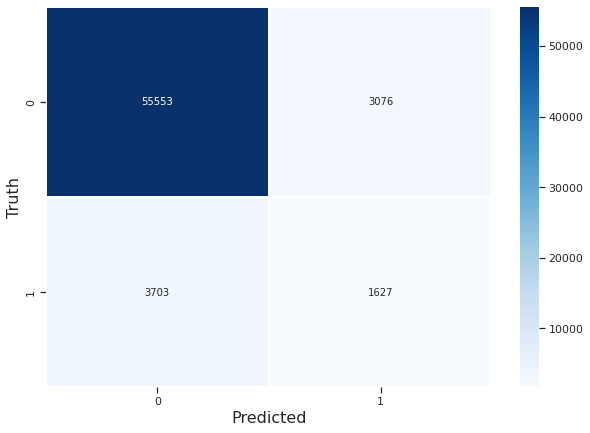

In [ ]:
#Confusion MAtrix on heatmap
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,linewidths=0.8,fmt='d',cmap='Blues')
plt.xlabel('Predicted',fontsize=16)
plt.ylabel('Truth',fontsize=16)

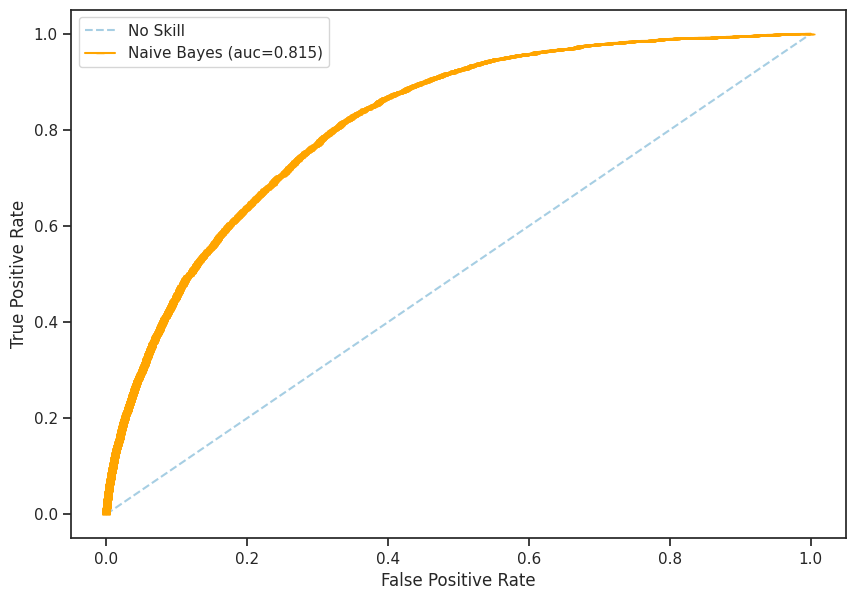

In [ ]:
#ROC-AUC
#predict Probabilities  
y_score_nb=nb_cv.predict_proba(X_test)   #results are probailities for each sample for each class
#retrieve the probabilities only for the class1 (yes, positve class)
yes_probs=y_score_nb[:,1]
#Size of the plot
plt.figure(figsize=(10,7), dpi=100)
#plot "No-Skill" on ROC Curve
plt.plot([0,1],[0,1],linestyle='--',label='No Skill')
# calculate the features of ROC curve
fpr_nb , tpr_nb, threshold_nb=roc_curve(y_test,yes_probs)  # false positive, true posistive, threshold
#AUC
auc_nb=auc(fpr_nb , tpr_nb)
#Plot the ROC Curve
plt.plot(fpr_nb, tpr_nb, marker='_', label='Naive Bayes (auc=%0.3f)' % auc_nb, color='Orange')
#X-axis label
plt.xlabel("False Positive Rate")
#Y-axis label
plt.ylabel("True Positive Rate")
#show the legend
plt.legend()
#show the plot
plt.show()

## AdaBoost

In [ ]:
#import
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
#make the model
ada_model=AdaBoostClassifier()
param_grid={'n_estimators':[50],'learning_rate':[1]} #all of them are default values
ada_cv=GridSearchCV(ada_model,param_grid,cv=cv)

In [ ]:
#fit the model on train dataset
ada_cv=ada_cv.fit(X_train_blnc,y_train_blnc)

In [ ]:
#the best hyperparametrs
ada_cv.best_params_

{'learning_rate': 1, 'n_estimators': 50}

In [ ]:
#test the model on the test dataset
y_pred=ada_cv.predict(X_test)

In [ ]:
#Evaluation
cm=confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[48591  9939]
 [ 1928  3501]]
0.8144592629653372
              precision    recall  f1-score   support

           0       0.96      0.83      0.89     58530
           1       0.26      0.64      0.37      5429

    accuracy                           0.81     63959
   macro avg       0.61      0.74      0.63     63959
weighted avg       0.90      0.81      0.85     63959



Text(66.5, 0.5, 'Truth')

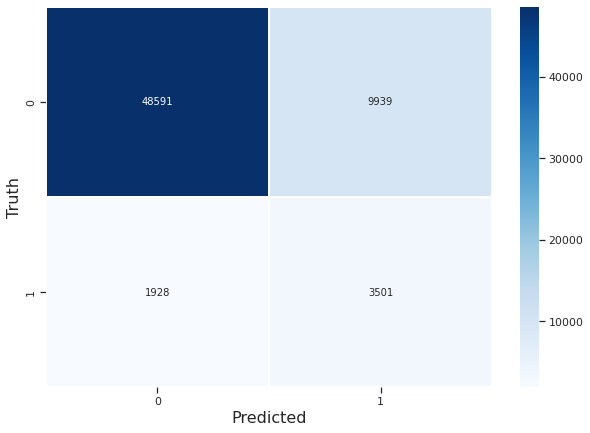

In [ ]:
#Confusion MAtrix on heatmap
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,linewidths=0.8,fmt='d',cmap='Blues')
plt.xlabel('Predicted',fontsize=16)
plt.ylabel('Truth',fontsize=16)

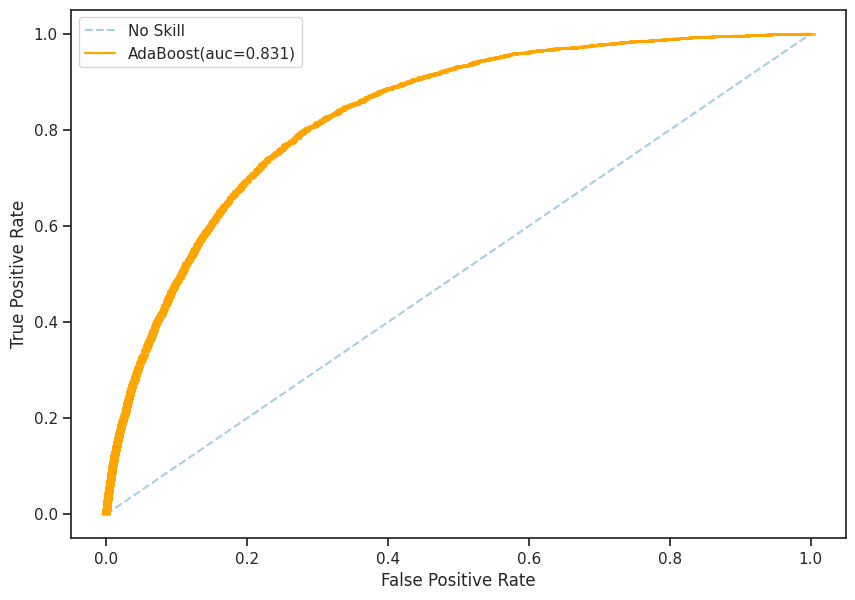

In [ ]:
#ROC-AUC
#predict Probabilities  
y_score_ada=ada_cv.predict_proba(X_test)   #results are probailities for each sample for each class
#retrieve the probabilities only for the class1 (yes, positve class)
yes_probs=y_score_ada[:,1]
#Size of the plot
plt.figure(figsize=(10,7), dpi=100)
#plot "No-Skill" on ROC Curve
plt.plot([0,1],[0,1],linestyle='--',label='No Skill')
# calculate the features of ROC curve
fpr_ada , tpr_ada, threshold_ada=roc_curve(y_test,yes_probs)  # false positive, true posistive, threshold
#AUC
auc_ada=auc(fpr_ada , tpr_ada)
#Plot the ROC Curve
plt.plot(fpr_ada, tpr_ada, marker='_', label='AdaBoost (auc=%0.3f)' % auc_ada, color='Orange')
#X-axis label
plt.xlabel("False Positive Rate")
#Y-axis label
plt.ylabel("True Positive Rate")
#show the legend
plt.legend()
#show the plot
plt.show()

## XGBoost 
#### It is for the phase 2 , not completed yet

In [ ]:
from xgboost import XGBClassifier
xg_model=XGBClassifier()
param_grid={'gamma':[0.12]}
xg_cv=GridSearchCV(xg_model,param_grid,cv=10)  
xg_cv.fit(X_train_blnc,y_train_blnc)

GridSearchCV(cv=10, estimator=XGBClassifier(), param_grid={'gamma': [0.12]})

In [ ]:
y_pred=xg_cv.predict(X_test)

In [ ]:
#Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[52380  6150]
 [ 2747  2682]]
0.8608952610265952
              precision    recall  f1-score   support

           0       0.95      0.89      0.92     58530
           1       0.30      0.49      0.38      5429

    accuracy                           0.86     63959
   macro avg       0.63      0.69      0.65     63959
weighted avg       0.90      0.86      0.88     63959



Text(66.5, 0.5, 'Truth')

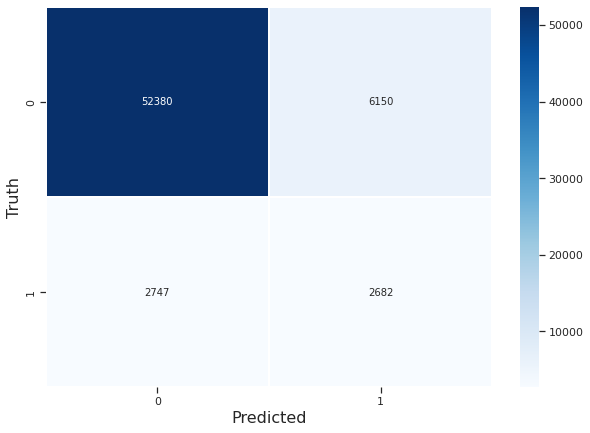

In [ ]:
#Confusion MAtrix on heatmap
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,linewidths=0.8,fmt='d',cmap='Blues')
plt.xlabel('Predicted',fontsize=16)
plt.ylabel('Truth',fontsize=16)

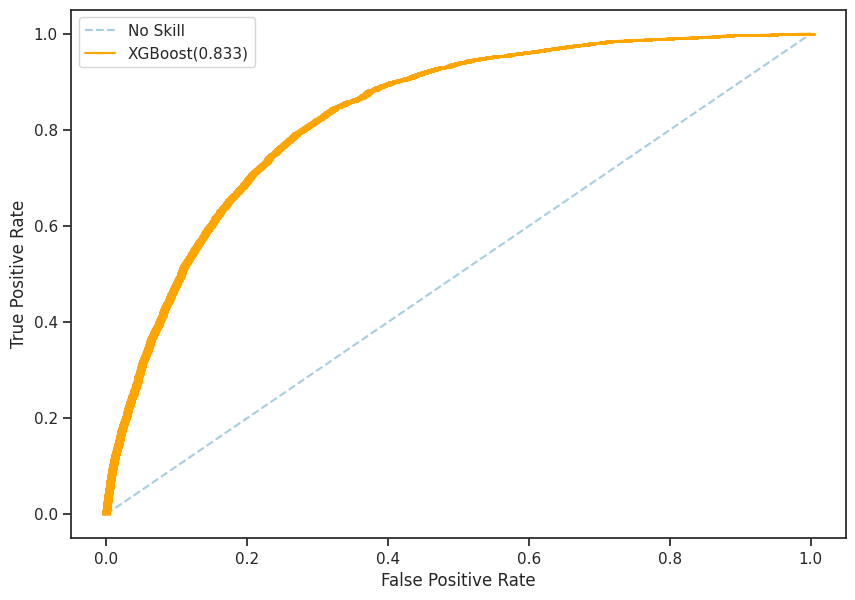

In [ ]:
#ROC-AUC
#predict Probabilities  
y_score_xg=xg_cv.predict_proba(X_test)   #results are probailities for each sample for each class
#retrieve the probabilities only for the class1 (yes, positve class)
yes_probs=y_score_xg[:,1]
#Size of the plot
plt.figure(figsize=(10,7), dpi=100)
#plot "No-Skill" on ROC Curve
plt.plot([0,1],[0,1],linestyle='--',label='No Skill')
# calculate the features of ROC curve
fpr_xg , tpr_xg, threshold_xg=roc_curve(y_test,yes_probs)  # false positive, true posistive, threshold
#AUC
auc_xg=auc(fpr_xg , tpr_xg)
#Plot the ROC Curve
plt.plot(fpr_xg, tpr_xg, marker='_', label='XGBoost (%0.3f)' % auc_xg, color='Orange')
#X-axis label
plt.xlabel("False Positive Rate")
#Y-axis label
plt.ylabel("True Positive Rate")
#show the legend
plt.legend()
#show the plot
plt.show()

## KNN

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [ ]:
param = {'algorithm':['auto']}
model_knn = KNeighborsClassifier(n_neighbors=2)
model_knn = GridSearchCV(model_knn, param_grid = param, cv=cv, verbose=3)
model_knn.fit(X_train_blnc, y_train_blnc)
predict = model_knn.predict(X_test)
print(classification_report(y_test, predict))

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV 1/10] END ...................algorithm=auto;, score=0.890 total time= 4.1min
[CV 2/10] END ...................algorithm=auto;, score=0.894 total time= 4.1min
[CV 3/10] END ...................algorithm=auto;, score=0.887 total time= 4.6min
[CV 4/10] END ...................algorithm=auto;, score=0.891 total time= 4.3min
[CV 5/10] END ...................algorithm=auto;, score=0.888 total time= 4.2min
[CV 6/10] END ...................algorithm=auto;, score=0.898 total time= 4.2min
[CV 7/10] END ...................algorithm=auto;, score=0.879 total time= 4.2min
[CV 8/10] END ...................algorithm=auto;, score=0.880 total time= 4.1min
[CV 9/10] END ...................algorithm=auto;, score=0.881 total time= 4.2min
[CV 10/10] END ..................algorithm=auto;, score=0.882 total time= 4.3min
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     58629
           1       0

In [ ]:
# golden_K(2)

In [ ]:
cm=confusion_matrix(y_test,predict)
print(confusion_matrix(y_test,predict))
print(accuracy_score(y_test,predict))
print(classification_report(y_test,predict))

[[53100  5529]
 [ 3739  1591]]
0.8550946700229834
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     58629
           1       0.22      0.30      0.26      5330

    accuracy                           0.86     63959
   macro avg       0.58      0.60      0.59     63959
weighted avg       0.87      0.86      0.86     63959



Text(66.5, 0.5, 'Truth')

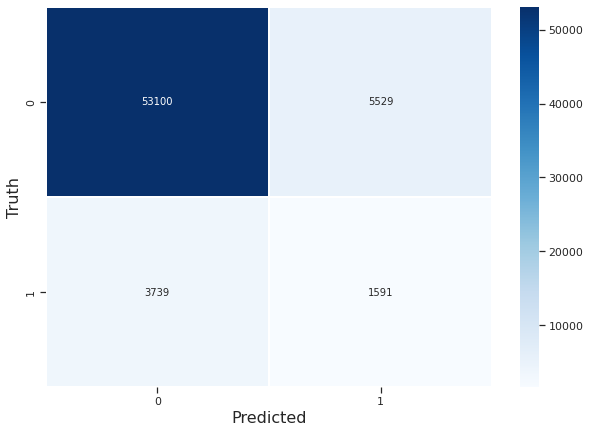

In [ ]:
#Confusion MAtrix on heatmap
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,linewidths=0.8,fmt='d',cmap='Blues')
plt.xlabel('Predicted',fontsize=16)
plt.ylabel('Truth',fontsize=16)

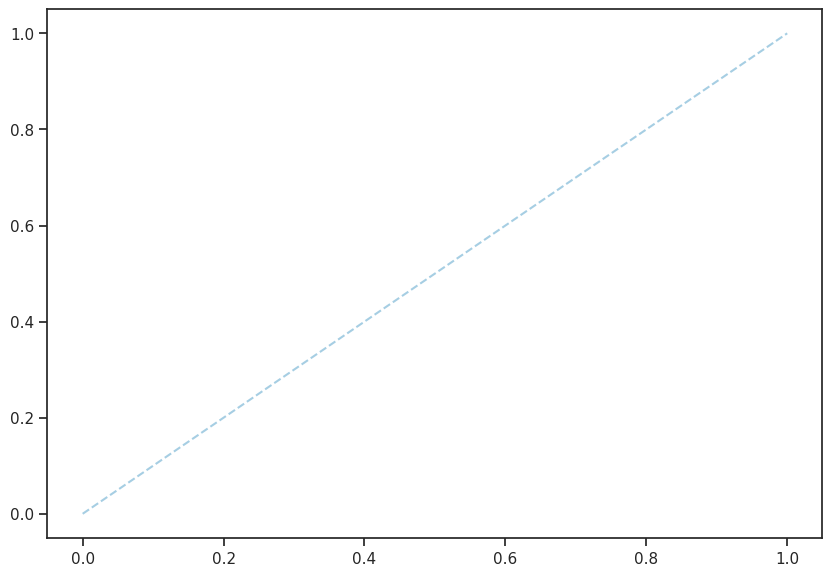

In [ ]:
#check
#ROC-AUC
#predict Probabilities  
y_score_knn=model_knn.predict_proba(X_test)   #results are probailities for each sample for each class
#retrieve the probabilities only for the class1 (yes, positve class)
yes_probs=y_score_knn[:,1]
#Size of the plot
plt.figure(figsize=(10,7), dpi=100)
#plot "No-Skill" on ROC Curve
plt.plot([0,1],[0,1],linestyle='--',label='No Skill')
# calculate the features of ROC curve
fpr_knn , tpr_knn, threshold_knn=roc_curve(y_test,yes_probs)  # false positive, true posistive, threshold

#AUC
auc_knn=auc(fpr_knn , tpr_knn)
#Plot the ROC Curve
plt.plot(fpr_knn , tpr_knn, marker='_', label='KNN (AUC=%0.3f)' %auc_knn, color='Orange')
#X-axis label
plt.xlabel("False Positive Rate")
#Y-axis label
plt.ylabel("True Positive Rate")
#show the legend
plt.legend()
#show the plot
plt.show()

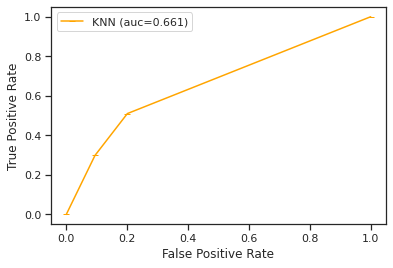

In [ ]:
# #Plot the ROC Curve
# plt.plot(fpr_knn , tpr_knn, marker='_', label='KNN (auc=%0.3f)' %auc_knn, color='Orange')
# #X-axis label
# plt.xlabel("False Positive Rate")
# #Y-axis label
# plt.ylabel("True Positive Rate")
# #show the legend
# plt.legend()
# #show the plot
# plt.show()

## SVM

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

# SVM
model_svm = SVC()
model_svm.fit(X_train_blnc, y_train_blnc)

SVC()

In [ ]:
y_pred_svm = model_svm.predict(X_test)

In [ ]:
#print(classification_report(y_test, y_pred_svm))

In [ ]:
#check 
cm=confusion_matrix(y_test,y_pred_svm )
print(confusion_matrix(y_test,y_pred_svm ))
print(accuracy_score(y_test,y_pred_svm ))
print(classification_report(y_test,y_pred_svm ))

In [ ]:
#check
#Confusion MAtrix on heatmap
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,linewidths=0.8,fmt='d',cmap='Blues')
plt.xlabel('Predicted',fontsize=16)
plt.ylabel('Truth',fontsize=16)

In [ ]:
#check
#ROC-AUC
#predict Probabilities  
y_score_svm=model_svm.predict_proba(X_test)   #results are probailities for each sample for each class
#retrieve the probabilities only for the class1 (yes, positve class)
yes_probs=y_score_svm[:,1]
#Size of the plot
plt.figure(figsize=(10,7), dpi=100)
#plot "No-Skill" on ROC Curve
plt.plot([0,1],[0,1],linestyle='--',label='No Skill')
# calculate the features of ROC curve
fpr_svm , tpr_svm, threshold_svm=roc_curve(y_test,yes_probs)  # false positive, true posistive, threshold
#AUC
auc_svm=auc(fpr_svm , tpr_svm)
#Plot the ROC Curve
plt.plot(fpr_svm, tpr_svm, marker='_', label='SVM (AUC=%0.3f)' % auc_svm, color='Orange')
#X-axis label
plt.xlabel("False Positive Rate")
#Y-axis label
plt.ylabel("True Positive Rate")
#show the legend
plt.legend()
#show the plot
plt.show()

# Compare the Models based on ROC-AUC 

## 1- KNN vs Naive Bayse vs Perceptron

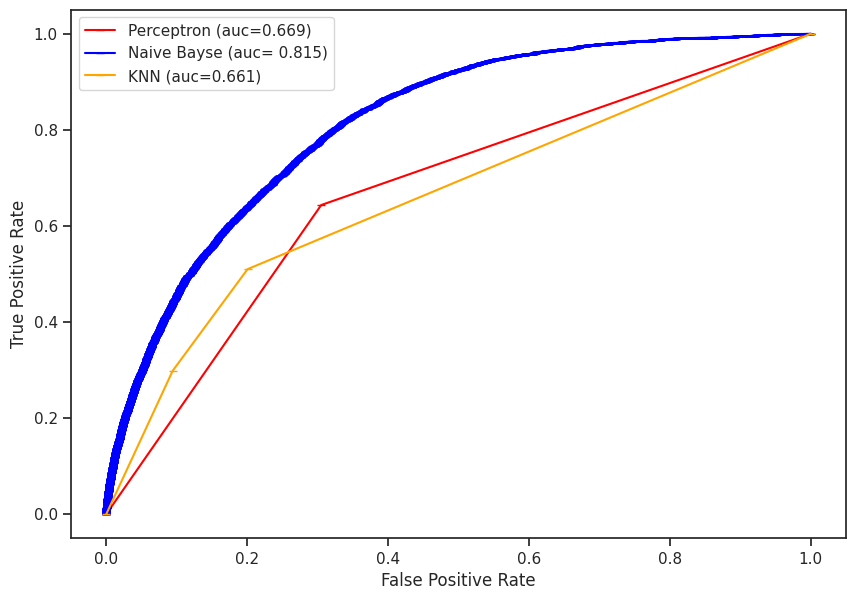

In [ ]:
#figure size
plt.figure(figsize=(10,7),dpi=100)
#Plot the ROC Curve
plt.plot(fpr_pr, tpr_pr, marker='_', label='Perceptron (auc=%0.3f)' % auc_pr, color='Red')
plt.plot(fpr_nb, tpr_nb, marker='_', label='Naive Bayse (auc= %0.3f)' % auc_nb, color='Blue')
plt.plot(fpr_knn, tpr_knn, marker='_', label='KNN (auc=%0.3f)' % auc_knn, color='Orange')  #  change this to KNN please

#X-axis label
plt.xlabel("False Positive Rate")
#Y-axis label
plt.ylabel("True Positive Rate")
#show the legend
plt.legend()
#show the plot
plt.show()

## 2- Decision Tree vs Random Forest vs AdaBoost

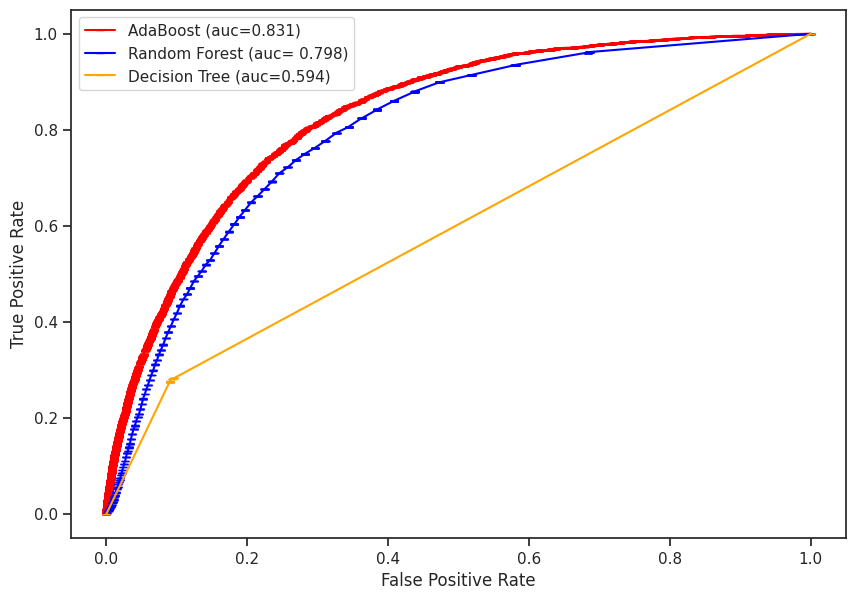

In [ ]:
#figure size
plt.figure(figsize=(10,7),dpi=100)
#Plot the ROC Curve
plt.plot(fpr_ada, tpr_ada, marker='_', label='AdaBoost (auc=%0.3f)' % auc_ada, color='Red')            #adaboost
plt.plot(fpr_rf, tpr_rf, marker='_', label='Random Forest (auc= %0.3f)' % auc_rf, color='Blue')         #random forest
plt.plot(fpr_tree , tpr_tree, marker='_', label='Decision Tree (auc=%0.3f)' % auc_tree, color='Orange')  #decision tree

#X-axis label
plt.xlabel("False Positive Rate")
#Y-axis label
plt.ylabel("True Positive Rate")
#show the legend
plt.legend()
#show the plot
plt.show()

## 3- SVM vs Logistic Regression vs Neural Network 

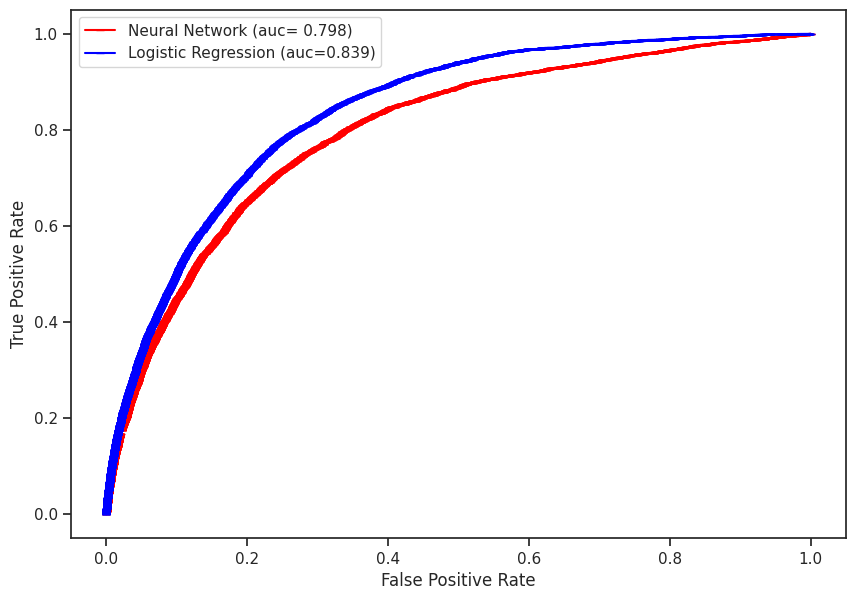

In [ ]:

#check
#figure size
plt.figure(figsize=(10,7),dpi=100)
#Plot the ROC Curve
plt.plot(fpr_log , tpr_log, marker='_', label='Logistic Regression (AUC=%0.3f)' %auc_log, color='Blue') #logistic Regression
plt.plot(fpr_nn, tpr_nn, marker='_', label='Neural Network (AUC= %0.3f)' % auc_nn, color='Red')  # Neural Network
plt.plot(fpr_svm, tpr_svm, marker='_', label='SVM (AUC=%0.3f)' % auc_svm, color='Orange') #SVM 

#X-axis label
plt.xlabel("False Positive Rate")
#Y-axis label
plt.ylabel("True Positive Rate")
#show the legend
plt.legend()
#show the plot
plt.show()
